In [38]:
import sqlite3
import numpy as np
import pandas as pd

In [2]:
conn = sqlite3.connect('student_laboratory.db')
curs = conn.cursor()

In [5]:
create_student_table = """
CREATE TABLE student (
student_id INT,
mechanics INT,
electromagnetics INT,
quantummechanics INT,
statisticalmechanics INT,
laboratory VARCHAR(20),
FOREIGN KEY(laboratory) REFERENCES laboratory(name)
)"""
curs.execute(create_student_table)

OperationalError: table student already exists

In [27]:
create_laboratory_table = """
CREATE TABLE laboratory (
name VARCHAR(20) PRIMARY KEY
)"""
curs.execute(create_laboratory_table)

In [7]:
insert_into_student = """
INSERT INTO student VALUES
(1, 5, 5, 5, 4, "q-theory"),
(2, 5, 4, 5, 4, "q-theory"),
(3, 5, 3, 4, 3, "q-theory"),
(4, 2, 4, 5, 5, "u-theory"),
(5, 3, 5, 4, 3, "u-theory"),
(6, 2, 2, 5, 5, "u-theory"),
(7, 4, 4, 4, 5, "m-theory"),
(8, 3, 3, 2, 4, "m-theory"),
(9, 4, 2, 5, 5, "m-theory");
"""
curs.execute(insert_into_student)

In [8]:
insert_into_laboratory= """
INSERT INTO laboratory VALUES
("q-theory"),
("u-theory"),
("m-theory");
"""
curs.execute(insert_into_laboratory)

In [12]:
# クエリを実行し、取得した結果を表示する関数
def print_results(cursor, query):
    "クエリを実行し、取得した結果を表示する関数"
    cursor.execute(query)
    results = cursor.fetchall()
    for result in results:
        print(result)

In [13]:
# 生徒の表と研究室の表を結合する
join_student_laboratory = """
SELECT laboratory.name, student_id, student.mechanics, student.electromagnetics,
student.quantummechanics, student.statisticalmechanics
FROM laboratory
JOIN student ON student.laboratory = laboratory.name
"""
print_results(curs, join_student_laboratory)

('q-theory', 1, 5, 5, 5, 4)
('q-theory', 2, 5, 4, 5, 4)
('q-theory', 3, 5, 3, 4, 3)
('u-theory', 4, 2, 4, 5, 5)
('u-theory', 5, 3, 5, 4, 3)
('u-theory', 6, 2, 2, 5, 5)
('m-theory', 7, 4, 4, 4, 5)
('m-theory', 8, 3, 3, 2, 4)
('m-theory', 9, 4, 2, 5, 5)


In [14]:
# 各研究室に所属している生徒の人数を取得
get_student_num = """
SELECT laboratory, COUNT(laboratory)
FROM student
GROUP BY laboratory"""

print_results(curs, get_student_num)

('m-theory', 3)
('q-theory', 3)
('u-theory', 3)


In [45]:
# 各研究室に所属している生徒の、各教科のGPの平均を取得し、DataFrameを作成
get_mean = """
SELECT laboratory, AVG(mechanics), AVG(electromagnetics), 
AVG(quantummechanics), AVG(statisticalmechanics)
FROM student
GROUP BY laboratory"""

curs.execute(get_mean)
results = curs.fetchall()

# まずはlistを作る。indexはDataFrameのインデックス用
mean_list = []
index = []

for result in results:
    result = list(result)
    mean_list.append(result[1:])
    index.append(result[0])

#numpy配列に変換
mean_array = np.array(mean_list)

# DataFrameに変換
columns = ["Mechanics", "ElectroMagnetics", "QuantumMechanics", "StatisticalMechanics"]
df = pd.DataFrame(mean_array, columns=columns, index=index)

df

,Mechanics,ElectroMagnetics,QuantumMechanics,StatisticalMechanics
m-theory,3.666667,3.000000,3.666667,4.666667
q-theory,5.000000,4.000000,4.666667,3.666667
u-theory,2.333333,3.666667,4.666667,4.333333


<AxesSubplot:>

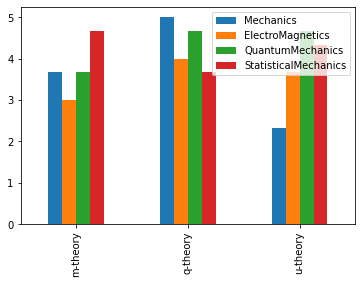

In [46]:
# 可視化
df.plot.bar()